In [1]:
import pickle

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import preprocessing

%matplotlib inline

In [2]:
import sklearn
sklearn.__version__

'1.5.2'

Приступим к разведочному анализу

In [3]:
df1 = pd.read_csv("../data/X_bp.csv")
df1.head(3)

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","Модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0,1.857143,2030.0,738.736842,30.0,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1,1.857143,2030.0,738.736842,50.0,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,2,1.857143,2030.0,738.736842,49.9,33.000000,284.615385,210.0,70.0,3000.0,220.0


In [4]:
df2 = pd.read_csv("../data/X_nup.csv")
df2.head(3)

,Unnamed: 0,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,0,4.0,57.0
1,1,0,4.0,60.0
2,2,0,4.0,70.0


In [5]:
# Выполняем объединение с пересечением по столбцу 'id'
data = pd.merge(df1, df2, on='Unnamed: 0', how='inner')
data.head(15)

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","Модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.000000,3000.000000,220.0,0,4.0,57.0
1,1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.000000,3000.000000,220.0,0,4.0,60.0
2,2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.000000,3000.000000,220.0,0,4.0,70.0
3,3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.000000,3000.000000,220.0,0,5.0,47.0
4,4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.000000,3000.000000,220.0,0,5.0,57.0
5,5,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.000000,3000.000000,220.0,0,5.0,60.0
6,6,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.000000,3000.000000,220.0,0,5.0,70.0
7,7,2.561475,1900.0,535.000000,111.86,22.267857,284.615385,380.0,75.000000,1800.000000,120.0,0,7.0,47.0
8,8,3.557018,1930.0,889.000000,129.00,21.250000,300.000000,380.0,75.000000,1800.000000,120.0,0,7.0,57.0
9,9,3.532338,2100.0,1421.000000,129.00,21.250000,300.000000,1010.0,78.000000,2000.000000,300.0,0,7.0,60.0


In [6]:
data= data.drop(columns=['Unnamed: 0'], axis = 1)
data.head(3)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","Модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.0,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.0,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.9,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0


In [7]:
data.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'Модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   Модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,1023.0,2.930366,0.913222,0.389403,2.317887,2.906878,3.552660,5.591742
"Плотность, кг/м3",1023.0,1975.734888,73.729231,1731.764635,1924.155467,1977.621657,2021.374375,2207.773481
"Модуль упругости, ГПа",1023.0,739.923233,330.231581,2.436909,500.047452,739.664328,961.812526,1911.536477
"Количество отвердителя, м.%",1023.0,110.570769,28.295911,17.740275,92.443497,110.564840,129.730366,198.953207
"Содержание эпоксидных групп,%_2",1023.0,22.244390,2.406301,14.254985,20.608034,22.230744,23.961934,33.000000
"Температура вспышки, С_2",1023.0,285.882151,40.943260,100.000000,259.066528,285.896812,313.002106,413.273418
"Поверхностная плотность, г/м2",1023.0,482.731833,281.314690,0.603740,266.816645,451.864365,693.225017,1399.542362
"Модуль упругости при растяжении, ГПа",1023.0,73.328571,3.118983,64.054061,71.245018,73.268805,75.356612,82.682051
"Прочность при растяжении, МПа",1023.0,2466.922843,485.628006,1036.856605,2135.850448,2459.524526,2767.193119,3848.436732
"Потребление смолы, г/м2",1023.0,218.423144,59.735931,33.803026,179.627520,219.198882,257.481724,414.590628


Приступим к предварительной обработке данных

In [7]:
min_max_scaler_x = preprocessing.MinMaxScaler()
min_max_scaler_y = preprocessing.MinMaxScaler()

In [8]:
data_y = data[["Модуль упругости при растяжении, ГПа"]]
data_x = data[['Количество отвердителя, м.%']]

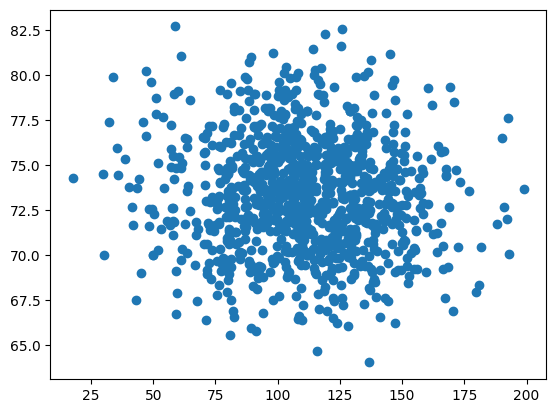

In [9]:
plt.scatter(data_x,data_y)


In [10]:
data_scaled_x = min_max_scaler_x.fit_transform(data_x)
data_scaled_y = min_max_scaler_y.fit_transform(data_y)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_scaled_x, 
                                                    data_scaled_y[:, 0], 
                                                    test_size=0.2)

Базовая модель - линейная регрессия

In [12]:
from sklearn.linear_model import LinearRegression

from sklearn import metrics

In [13]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

Оценка качества

In [14]:
y_pred = regressor.predict(X_test)

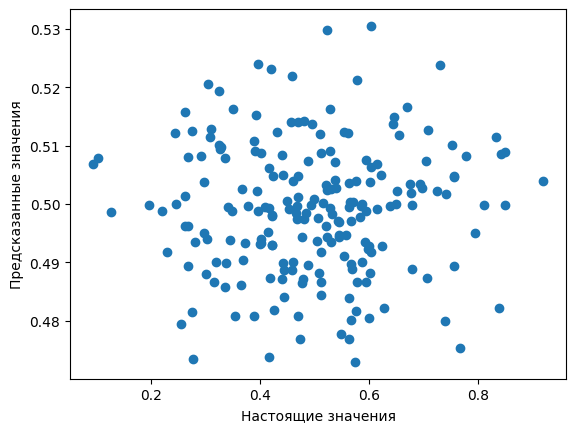

Корень из среднеквадратичной ошибки: 0.15408182302307677


In [15]:
plt.scatter(y_test, y_pred)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")
plt.show()

print('Корень из среднеквадратичной ошибки:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Сохранение модели

y = ax + b

In [16]:
regressor.coef_

array([-0.08090832])

In [15]:
regressor.intercept_

np.float64(0.5306746301865988)

In [17]:
X_test

array([[0.38111614],
       [0.46059306],
       [0.57398986],
       [0.76780681],
       [0.4889277 ],
       [0.48746345],
       [0.4437642 ],
       [0.49415959],
       [0.46568171],
       [0.77695775],
       [0.71237433],
       [0.46146877],
       [0.56156698],
       [0.62964423],
       [0.53053863],
       [0.57871458],
       [0.38614695],
       [0.29758519],
       [0.30716563],
       [0.51144224],
       [0.55878634],
       [0.57663299],
       [0.38780483],
       [0.29215659],
       [0.74025727],
       [0.57491253],
       [0.39498209],
       [0.34716622],
       [0.61797896],
       [0.40189352],
       [0.31635891],
       [0.40101595],
       [0.61663586],
       [0.32291583],
       [0.40246348],
       [0.53767721],
       [0.44535674],
       [0.38433603],
       [0.5157506 ],
       [0.47610934],
       [0.31894154],
       [0.50748857],
       [0.49441635],
       [0.58174396],
       [0.65767722],
       [0.63267055],
       [0.39569418],
       [0.462

In [17]:
y_test

array([0.51211947, 0.47766044, 0.34567729, 0.47030138, 0.67676514,
       0.41591825, 0.48512481, 0.66556072, 0.63779001, 0.53534159,
       0.59573142, 0.59275281, 0.4166072 , 0.51878542, 0.21213834,
       0.46306472, 0.64661509, 0.47896006, 0.39260896, 0.77851463,
       0.29114431, 0.43701555, 0.40207506, 0.41361671, 0.5372715 ,
       0.56575338, 0.41636726, 0.56273   , 0.85702841, 0.34194639,
       0.49949537, 0.87855971, 0.32996004, 0.15182308, 0.18258996,
       0.57732948, 0.67692576, 0.17393269, 0.74865507, 1.        ,
       0.40999591, 0.40152744, 0.75250148, 0.58055772, 0.41478785,
       0.63948471, 0.47155893, 0.60155854, 0.49889464, 0.49835852,
       0.54584241, 0.35402059, 0.75666621, 0.48255454, 0.33862285,
       0.29891381, 0.10338903, 0.4381827 , 0.47800944, 0.58519882,
       0.45097162, 0.35376006, 0.39697903, 0.62320596, 0.19877414,
       0.43757387, 0.4638309 , 0.61496296, 0.47512975, 0.72606015,
       0.36462863, 0.30139037, 0.55122053, 0.5349195 , 0.41010

In [23]:
X_test.shape

(205, 1)

In [24]:
X_test[0]

array([0.45589397])

In [25]:
#переменная coef для ввода значения Количество отвердителя, м.% для последующего предсказания
coef = X_test[0]
mu = -0.06 * coef

In [26]:
mu

array([-0.02735364])

In [27]:
X_test.shape

(205, 1)

Проверим работу модели. Предположим пользователь ввел коэфициент= 104

In [18]:
user_coef=104

In [19]:
scaled_coef=min_max_scaler_x.transform ([[user_coef]])
scaled_coef

e:\andan\integrate-ml\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.47601308]])

In [20]:
predicted_mu = regressor.predict(scaled_coef)
predicted_mu

array([0.50132104])

In [21]:
np.round(min_max_scaler_y.inverse_transform([predicted_mu])[0][0], 2)

np.float64(73.39)

In [26]:
with open("../models/scaler_x.pkl", "wb") as f:
    pickle.dump(min_max_scaler_x, f)

In [23]:
with open("../models/scaler_y.pkl", "wb") as f:
    pickle.dump(min_max_scaler_y, f)

In [24]:
with open("../models/lr_model.pkl", "wb") as f:
    pickle.dump(regressor, f)

### Дерево решений и случайный лес

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
?RandomForestRegressor

In [37]:
n_estimators = [int(x) for x in np.linspace(start=50, stop=400, num=4)]

max_depth = [int(x) for x in np.linspace(2, 50, num=3)]
max_depth.append(None)

min_samples_leaf = [1, 4]

param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf
              }
param_grid

{'n_estimators': [50, 166, 283, 400],
 'max_depth': [2, 26, 50, None],
 'min_samples_leaf': [1, 4]}

In [38]:
rf = RandomForestRegressor()

In [59]:
rf_random = GridSearchCV(estimator=rf, 
                         param_grid=param_grid, 
                         cv=5, 
                         verbose=2)

rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ...max_depth=2, min_samples_leaf=1, n_estimators=50; total time=   0.6s
[CV] END ...max_depth=2, min_samples_leaf=1, n_estimators=50; total time=   0.6s
[CV] END ...max_depth=2, min_samples_leaf=1, n_estimators=50; total time=   0.2s
[CV] END ...max_depth=2, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV] END ...max_depth=2, min_samples_leaf=1, n_estimators=50; total time=   0.2s
[CV] END ..max_depth=2, min_samples_leaf=1, n_estimators=166; total time=   1.6s
[CV] END ..max_depth=2, min_samples_leaf=1, n_estimators=166; total time=   1.9s
[CV] END ..max_depth=2, min_samples_leaf=1, n_estimators=166; total time=   1.7s
[CV] END ..max_depth=2, min_samples_leaf=1, n_estimators=166; total time=   2.4s
[CV] END ..max_depth=2, min_samples_leaf=1, n_estimators=166; total time=   1.1s
[CV] END ..max_depth=2, min_samples_leaf=1, n_estimators=283; total time=   2.2s
[CV] END ..max_depth=2, min_samples_leaf=1, n_e

KeyboardInterrupt: 

In [40]:
rf = rf_random.best_estimator_

In [41]:
rf

RandomForestRegressor(max_depth=2, min_samples_leaf=4, n_estimators=283)

In [42]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, min_samples_leaf=4, n_estimators=283)

In [43]:
y_pred = rf.predict(X_test)

e = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
e

np.float64(0.1623992649286119)

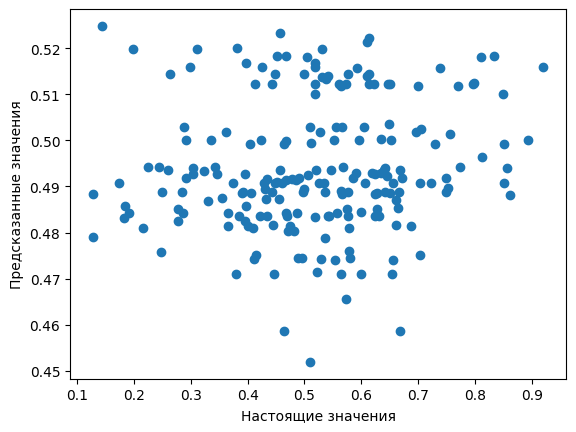

Корень из среднеквадратичной ошибки: 0.1623992649286119


In [44]:
plt.scatter(y_test, y_pred)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")
plt.show()

print('Корень из среднеквадратичной ошибки:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [45]:
with open("rf.pkl", "wb") as f:
    pickle.dump(rf, f)

In [46]:
with open("scaler_x.pkl", "wb") as f:
    pickle.dump(min_max_scaler_x, f)

In [47]:
with open("scaler_y.pkl", "wb") as f:
    pickle.dump(min_max_scaler_y, f)

---

Логика для Flask-приложения

In [48]:
with open("rf.pkl", "rb") as f:
    model = pickle.load(f)

In [49]:
with open("scaler_x.pkl", "rb") as f:
    scaler_x = pickle.load(f)

In [50]:
with open("scaler_y.pkl", "rb") as f:
    scaler_y = pickle.load(f)

In [51]:
area = 55.5

In [52]:
X_test.shape

(205, 1)

In [53]:
X_test

array([[0.45589397],
       [0.5630284 ],
       [0.50861427],
       [0.42841821],
       [0.24766803],
       [0.56537267],
       [0.58617011],
       [0.34948454],
       [0.22189093],
       [0.47026883],
       [0.51037203],
       [0.49837925],
       [0.19604822],
       [0.33996787],
       [0.74003329],
       [0.18428985],
       [0.51052921],
       [0.47962636],
       [0.69780603],
       [0.50288183],
       [0.72958523],
       [0.70917639],
       [0.30082839],
       [0.44535674],
       [0.61397232],
       [0.25538532],
       [0.49093809],
       [0.59802348],
       [0.59902218],
       [0.47624969],
       [0.39151649],
       [0.54024239],
       [0.664252  ],
       [0.42632151],
       [0.70082402],
       [0.62871041],
       [0.49441635],
       [0.51251966],
       [0.53475328],
       [0.42032984],
       [0.63880305],
       [0.44147006],
       [0.4314867 ],
       [0.63344276],
       [0.55177896],
       [0.50822994],
       [0.80673548],
       [0.511

In [54]:
params = [[area]]

In [55]:
params = scaler_x.transform(params)

C:\Users\Семья\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [56]:
y_pred = model.predict(params)

In [57]:
y_pred

array([0.51607098])

In [58]:
scaler_y.inverse_transform([y_pred])

array([[73.66742584]])